In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv('rotten_tomatoes_reviews.csv')
data.head()

,Freshness,Review
0,1,"Manakamana doesn't answer any questions, yet ..."
1,1,Wilfully offensive and powered by a chest-thu...
2,0,It would be difficult to imagine material mor...
3,0,Despite the gusto its star brings to the role...
4,0,If there was a good idea at the core of this ...


In [2]:
data = data.rename(columns={"Freshness": "sentiment", "Review": "review"})
data = data.iloc[:500,:]

In [3]:
data.shape
data.info()
data.sentiment.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  500 non-null    int64 
 1   review     500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


1    256
0    244
Name: sentiment, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
# Here we split data to training and testing parts
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [5]:
import pandas as pd
import re
from bs4 import BeautifulSoup 

import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

from keras.layers import LSTM
from keras.layers import SpatialDropout1D

Using TensorFlow backend.
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yuyunzhi/opt/anaconda3/lib/p

In [6]:
def cleanText(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [7]:
train.isna().sum()

sentiment    0
review       0
dtype: int64

In [8]:
train.reset_index(drop=True, inplace=True)

In [9]:
train.shape

(400, 2)

In [10]:
from nltk.stem.snowball import SnowballStemmer 

corpus= []
for i in range(0, 400):
    corpus.append(cleanText(train['review'][i]))
corpus1 = corpus

In [11]:
train['new_review']=corpus

/Users/yuyunzhi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
from wordcloud import WordCloud,STOPWORDS

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuyunzhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
positive=train[train['sentiment']==1]
words = ' '.join(positive['new_review'])
split_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

In [16]:
from matplotlib import pyplot as plt

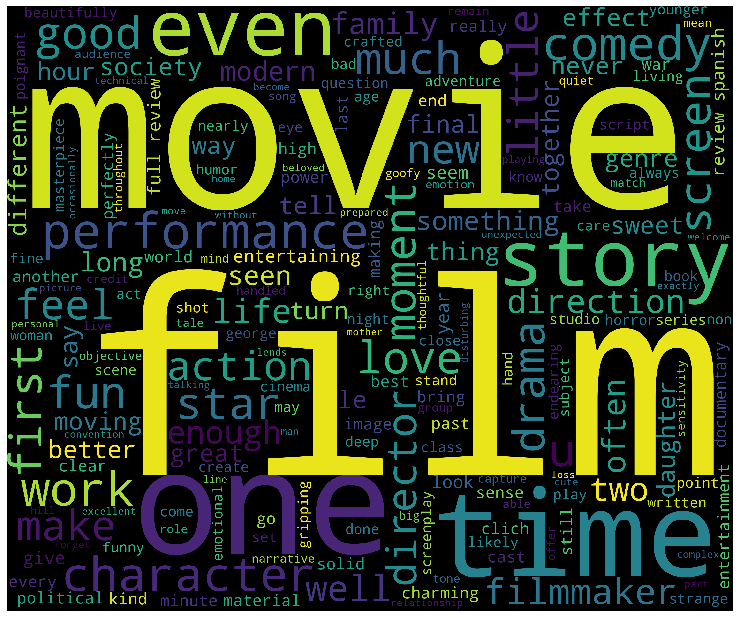

In [17]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
#vectorize every word in postive Sentiment
pos=positive['new_review']
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [19]:
#fit the transformation
pos_words = vectorizer.fit_transform(pos)
pos_words = pos_words.toarray()
pos_words.shape

(202, 1650)

In [20]:
pos=vectorizer.get_feature_names()

In [21]:
dist = np.sum(pos_words, axis=0)
postive_new= pd.DataFrame(dist)
postive_new.columns=['word_count']
postive_new['word'] = pd.Series(pos, index=postive_new.index)
postive_new1=postive_new[['word','word_count']]
postive_new1.head()

,word,word_count
0,abandoned,1
1,ability,1
2,able,3
3,absorbing,1
4,absorptive,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test = cv.fit_transform(corpus1).toarray()
y = train.iloc[:, 0].values

In [23]:
#using multinomial Naive Bayes 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# y_real_pred = classifier.predict(x__test)

In [25]:
mse = ((y_pred - y_test) ** 2).mean()
mse

0.4125

In [28]:
import math

In [29]:
rmse = math.sqrt(mse)
rmse

0.6422616289332564

In [38]:
y_test.shape

(80,)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[21, 12],
       [21, 26]])

In [34]:
print(classification_report(y_test, y_pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.50      0.64      0.56        33
Good Reviews       0.68      0.55      0.61        47

    accuracy                           0.59        80
   macro avg       0.59      0.59      0.59        80
weighted avg       0.61      0.59      0.59        80



Text(69.0, 0.5, 'Actual')

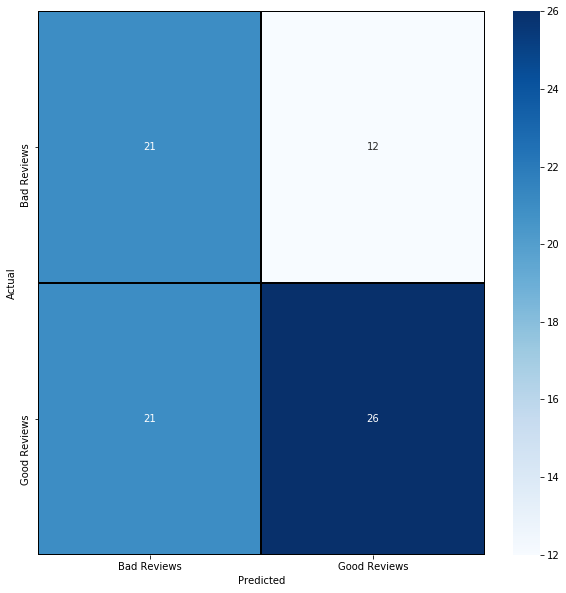

In [40]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Bad Reviews','Good Reviews'] , yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")